Using device: cpu
Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 128MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 15.9MB/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 94.2MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.36MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch 1/20


Batch 0/469, Loss: 2.3022
Batch 50/469, Loss: 0.5397
Batch 100/469, Loss: 0.4959
Batch 150/469, Loss: 0.2146
Batch 200/469, Loss: 0.0952
Batch 250/469, Loss: 0.1884
Batch 300/469, Loss: 0.1106
Batch 350/469, Loss: 0.1114
Batch 400/469, Loss: 0.1115
Batch 450/469, Loss: 0.1387
Train Loss: 0.3295, Train Accuracy: 89.70%
Test Accuracy: 98.14%
Saved best model with accuracy: 98.14%
Epoch 2/20
Batch 0/469, Loss: 0.1656
Batch 50/469, Loss: 0.1759
Batch 100/469, Loss: 0.1924
Batch 150/469, Loss: 0.0959
Batch 200/469, Loss: 0.1787
Batch 250/469, Loss: 0.0618
Batch 300/469, Loss: 0.0826
Batch 350/469, Loss: 0.0900
Batch 400/469, Loss: 0.0557
Batch 450/469, Loss: 0.1794
Train Loss: 0.1039, Train Accuracy: 96.97%
Test Accuracy: 98.65%
Saved best model with accuracy: 98.65%
Epoch 3/20
Batch 0/469, Loss: 0.0710
Batch 50/469, Loss: 0.0672
Batch 100/469, Loss: 0.0372
Batch 150/469, Loss: 0.1701
Batch 200/469, Loss: 0.0678
Batch 250/469, Loss: 0.0294
Batch 300/469, Loss: 0.0580
Batch 350/469, Loss: 0.

<ipython-input-1-2b7bc8ab3cea>:182: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path))


Test Accuracy: 99.36%


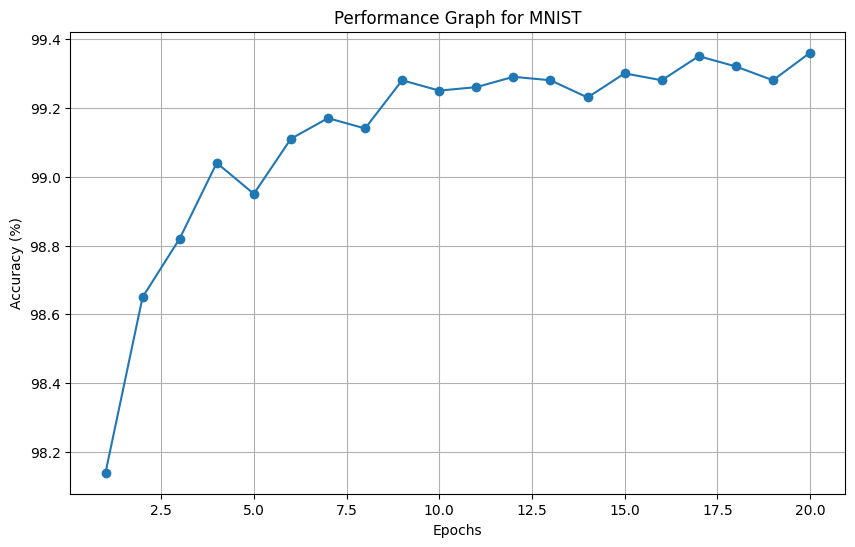

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
import os
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
import matplotlib.pyplot as plt

# Generic data loader for any dataset
def load_data(dataset_name="MNIST", batch_size=128):
    # Define default transformations
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))  # Default normalization
    ])

    # Load dataset
    if dataset_name.upper() == "MNIST":
        train_dataset = torchvision.datasets.MNIST(root="./data", train=True, download=True, transform=transform)
        test_dataset = torchvision.datasets.MNIST(root="./data", train=False, download=True, transform=transform)
        input_channels = 1
        input_size = 28
        num_classes = 10

    elif dataset_name.upper() == "CIFAR10":
        transform = transforms.Compose([
            transforms.RandomHorizontalFlip(),
            transforms.RandomCrop(32, padding=4),
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        ])
        train_dataset = torchvision.datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
        test_dataset = torchvision.datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)
        input_channels = 3
        input_size = 32
        num_classes = 10

    else:
        raise ValueError(f"Dataset '{dataset_name}' not supported.")

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

    return train_loader, test_loader, input_channels, input_size, num_classes

# Flexible CNN Model
class FlexibleCNN(nn.Module):
    def __init__(self, input_channels, input_size, num_classes):
        super(FlexibleCNN, self).__init__()
        self.conv1 = nn.Conv2d(input_channels, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * (input_size // 4) * (input_size // 4), 128)
        self.fc2 = nn.Linear(128, num_classes)
        self.dropout = nn.Dropout(0.5)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)  # Flatten
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# Training function
def train_model(model, train_loader, optimizer, loss_fn, device):
    model.train()
    correct = 0
    total = 0
    running_loss = 0.0

    for batch_idx, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Metrics
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if batch_idx % 50 == 0:
            print(f"Batch {batch_idx}/{len(train_loader)}, Loss: {loss.item():.4f}")

    accuracy = 100 * correct / total
    print(f"Train Loss: {running_loss / len(train_loader):.4f}, Train Accuracy: {accuracy:.2f}%")
    return accuracy

# Evaluation function
def evaluate_model(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")
    return accuracy

# Plotting function
def plot_performance_graph(accuracy_values, title, save_path):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(accuracy_values) + 1), accuracy_values, marker='o')
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy (%)")
    plt.grid(True)
    plt.savefig(save_path)
    plt.show()

# Download files function
def download_files():
    from google.colab import files
    files_to_download = ["mnist_training.log", "best_mnist_model.pth", "mnist_performance_graph.png"]
    for file in files_to_download:
        if os.path.exists(file):
            print(f"Downloading {file}...")
            files.download(file)
        else:
            print(f"File {file} not found, skipping download.")


# Main function
def main(dataset_name="MNIST", epochs=10, batch_size=128):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    log_file = f"{dataset_name.lower()}_training.log"

    # Load dataset
    train_loader, test_loader, input_channels, input_size, num_classes = load_data(dataset_name, batch_size)

    # Initialize model, optimizer, and scheduler
    model = FlexibleCNN(input_channels, input_size, num_classes).to(device)
    optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)
    scheduler = StepLR(optimizer, step_size=5, gamma=0.7)
    loss_fn = nn.CrossEntropyLoss()

    # Training and evaluation
    best_accuracy = 0.0
    best_model_path = f"best_{dataset_name.lower()}_model.pth"
    accuracy_values = []

    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}")
        train_accuracy = train_model(model, train_loader, optimizer, loss_fn, device)
        test_accuracy = evaluate_model(model, test_loader, device)
        accuracy_values.append(test_accuracy)

        # Save logs
        with open(log_file, "a") as f:
            f.write(f"Epoch {epoch + 1}: Test Accuracy: {test_accuracy:.2f}%\n")

        # Save the best model
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            torch.save(model.state_dict(), best_model_path)
            print(f"Saved best model with accuracy: {best_accuracy:.2f}%")

        scheduler.step()

    print(f"Training complete. Best Test Accuracy: {best_accuracy:.2f}%")

    # Load and test the best model
    model.load_state_dict(torch.load(best_model_path))
    evaluate_model(model, test_loader, device)

    # Plot performance graph
    plot_performance_graph(accuracy_values, f"Performance Graph for {dataset_name}", f"{dataset_name.lower()}_performance_graph.png")

    # Download all generated files
    download_files()

# Run the program
if __name__ == "__main__":
    main(dataset_name="MNIST", epochs=20, batch_size=128)
